In [1]:
import sys

sys.path.insert(1, '../..')
import ROOT

Welcome to JupyROOT 6.22/06


In [2]:
%config Completer.use_jedi = False

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions.other_functions import process_date, process_exposure, chi2, linear
import random
from tqdm import tqdm_notebook
%matplotlib inline 

In [4]:
def model(t, p0, p1, p2):
    y = []
    for i in range(len(t)):
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t[i]/p1))
        f2 = (2/np.pi**2)*p1*temp
        y.append(p0*(t[i] + f2) + p2)
    return y


In [5]:
def model_day(x, p0, p1, p2):
    y = []
    for i in range(len(x)):
        t = x[i]*3600*24
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/p1))
        f2 = (2/np.pi**2)*p1*temp
        y.append(p0*(t + f2) + p2)
    return y

In [6]:
def linear_days(x, m, c):
    return m*x*3600*24 + c

In [7]:
def residual(y_obs, y_expected, y_err):
    return ((y_obs - y_expected)/y_err)

In [62]:
data_ch0 = np.loadtxt('/Users/willquinn/Desktop/pmt_output_files/apulse_num_ch0.txt', delimiter=',', unpack=True)
print(data_ch0)
date = np.array(process_date(data_ch0[0]))
exposure = np.array(process_exposure(data_ch0[0]))
apulse_rates = data_ch0[1]
apulse_rates_err = data_ch0[2]/5
he_apulse_rates = data_ch0[3]
he_apulse_rates_err = data_ch0[4]/5

try:
    start = np.where(date == 0)[0][-1]
except:
    start = np.where(date == 1)[0][0]
mid = np.where(date == 98)[0][0]
date_days = date - 98
date = (date - 98)*24*60*60
print(process_date(data_ch0[0]))

data_ch1 = np.loadtxt('/Users/willquinn/Desktop/pmt_output_files/apulse_num_ch1.txt', delimiter=',', unpack=True)
print(data_ch1)
date_1 = np.array(process_date(data_ch1[0]))
exposure_1 = np.array(process_exposure(data_ch1[0]))
apulse_rates_1 = data_ch1[1]
apulse_rates_err_1 = data_ch1[2]/5
he_apulse_rates_1 = data_ch1[3]
he_apulse_rates_err_1 = data_ch1[4]/5

try:
    start_1 = np.where(date_1 == 0)[0][-1]
except:
    start_1 = np.where(date_1 == 1)[0][0]
mid_1 = np.where(date_1 == 98)[0][0]
date_days_1 = date_1 - 98
date_1 = (date_1 - 98)*24*60*60
print(process_date(data_ch1[0]))

[[1.90704000e+05 1.91008000e+05 1.91009000e+05 ... 2.01217000e+05
  2.01218000e+05 2.01220000e+05]
 [3.64790256e+01 4.02668669e+01 3.86409858e+01 ... 7.74010655e+01
  5.05813953e+01 5.01713167e+01]
 [6.04605392e+00 6.35299344e+00 6.22336711e+00 ... 8.80333295e+00
  7.22732029e+00 7.16961695e+00]
 [4.72423018e+00 5.65503697e+00 5.15013758e+00 ... 6.09622183e+01
  4.03746770e+01 3.85707293e+01]
 [2.17382164e+00 2.37842053e+00 2.26974098e+00 ... 7.81170702e+00
  6.43643710e+00 6.26888537e+00]]
[  0 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -14 -13 -12
 -10  -9  -8  -7  -6  -4  -3  -2   0   0   0   1   1   2   3   4   5   6
   7   8  10  11  12  13  14  15  16  17  18  19  21  22  23  24  25  26
  27  28  29  30  31  33  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  

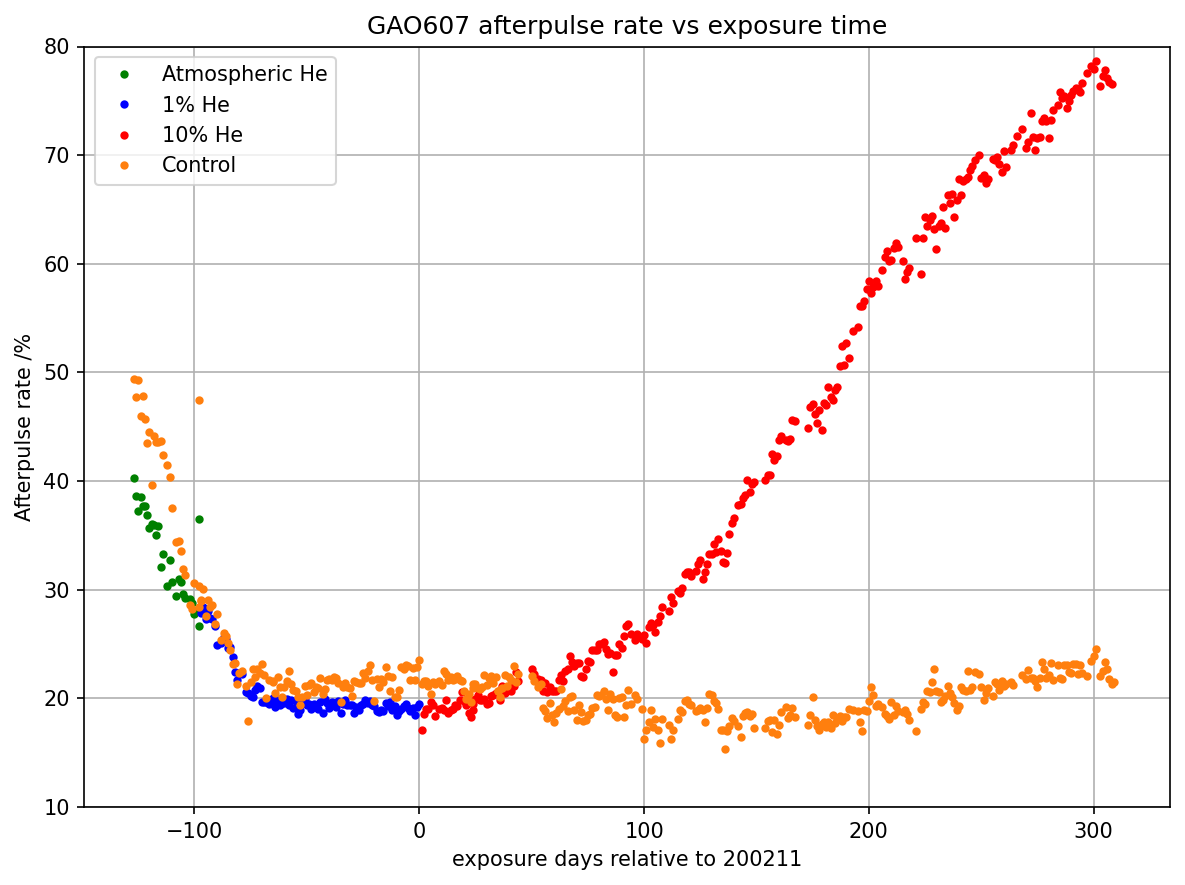

In [86]:
fig1 = plt.figure(figsize=(8, 6), facecolor='white', dpi=150)
plt.plot(date_days[:start + 1], np.array(apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date_days[start+1:mid + 1], np.array(apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.plot(date_days[mid+1:][:-3], np.array(apulse_rates[mid+1:][:-3]),
                 "r.", label="10% He")
plt.plot(date_days_1, np.array(apulse_rates_1),
                 "C1.", label="Control")
popt, pcov = curve_fit(model, date_days[mid+1:][:-3], apulse_rates[mid+1:][:-3],
                       sigma=apulse_rates_err[mid+1:][:-3], p0=[0.1,1,19])
chi_2 = chi2(apulse_rates[mid+1:], apulse_rates_err[mid+1:], model(date[mid+1:], *popt), len(popt))
#plt.plot(date_days[mid+1:][:-3], model(np.array(date_days[mid+1:][:-3]), *popt), 'k', label='model')
#plt.axvline(date_days[start], 0, 100, ls='--', color='k')
#plt.axvline(date_days[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure days relative to 200211")
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.grid()
plt.ylim(10,80)
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig("/Users/willquinn/Desktop/model.png")

In [10]:

#print(date[mid:], apulse_rates[mid:], apulse_rates_err[mid:])

In [11]:
chi_2 = 100
n_times = 1
n = 0
for n in range(n_times):
    p_bounds = [[0,0,18],[1e5,1e10,20]]
    '''p0 = random.uniform(p_bounds[0][0],p_bounds[1][0])
    p1 = random.uniform(p_bounds[0][1],p_bounds[1][1])
    p2 = random.uniform(p_bounds[0][2],p_bounds[1][2])
    p3 = random.uniform(p_bounds[0][3],p_bounds[1][3])
    p4 = random.uniform(p_bounds[0][4],p_bounds[1][4])'''
    p0 = 0.1
    p1 = 1
    p2 = 19
    p_guess = [p0, p1, p2]
    
    popt, pcov = curve_fit(model, date[mid+1:], apulse_rates[mid+1:], sigma=apulse_rates_err[mid+1:], p0=p_guess,
                           bounds=p_bounds)
    chi_2 = chi2(apulse_rates[mid+1:], apulse_rates_err[mid+1:], model(date[mid+1:], *popt), len(popt))
   
    if chi_2 < 1:
        break


print('Param p{}: {:.8f} ± {:.8f}'.format(0, popt[0], np.sqrt(pcov[0,0])))
print('Param p{}: {:.9f} ± {:.9f}'.format(1, popt[1], np.sqrt(pcov[1,1])))
print('Param p{}: {:.1f} ± {:.1f}'.format(2, popt[2], np.sqrt(pcov[2,2])))
print('Chi2 is:', chi_2)

Param p0: 0.00000312 ± 0.00000003
Param p1: 40237759.320744082 ± 0.000000024
Param p2: 19.0 ± 0.2
Chi2 is: 6.241677862745832


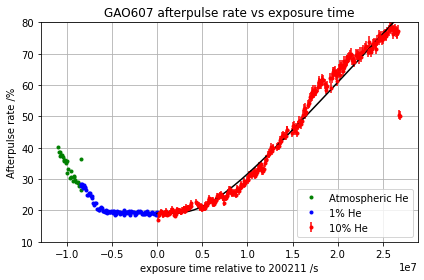

In [12]:
plt.plot(date[:start + 1], np.array(apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date[start+1:mid + 1], np.array(apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
x_range = np.linspace(0,date[-1],1000)
plt.plot(x_range, model(x_range, *popt), 'k')
#plt.axvline(date[start], 0, 100, ls='--', color='k')
#plt.axvline(date[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure time relative to 200211 /s")
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.grid()
plt.ylim(10,80)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model.png")

$C_g(t) = \eta(t)P_0 ( t + \frac{2}{\pi^2}P_1\sum^{10}_{n=1}\frac{(-1)^n}{n^2}(1 - e^{\frac{-n^2\pi^2t}{P_1}}) + P_2$

$P_0 = \frac{C_2D}{lV}$, $P_1 = \frac{l^2}{D} = 6L$

<ipython-input-13-7471f6468493>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


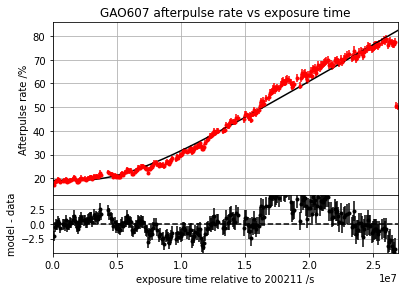

In [13]:
#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(x_range, model(x_range, *popt), 'k')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual.png")

In [39]:
from scipy.special import erf

my_x = np.array(date[mid+1:-2])
my_y = np.array(apulse_rates[mid+1:-2])
my_y_err = np.array(apulse_rates_err[mid+1:-2])
print(popt)

def model_eps(t, p0, p1, p2, p3, p4):
    y = []
    for i in range(len(t)):
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t[i]/p1))
        f2 = (2/np.pi**2)*p1*temp
        f3 = 1 - 1/( 1 + np.exp(-p4*(t[i] - p3)) )
        
        y.append(f3*(p0*(t[i] + f2) + p2))
    return y

sw = 0.1
p0 = popt[0]
p1 = popt[1]
p2 = popt[2]
p3 = 2e7
p4 = 0.00001
p5 = 1000
p_guess = [p0, p1, p2, p3, p4]
p_bounds = [[p0*(1-sw),p1*(1-sw),p2*(1-sw),0   ,0.00000001],
            [p0*(1+sw),p1*(1+sw),p2*(1+sw),10e7,0.0001]]
    
popt_, pcov_ = curve_fit(model_eps, my_x, my_y, sigma=my_y_err, p0=p_guess, bounds=p_bounds, maxfev=10000)
chi_2_ = chi2(my_y, my_y_err, model_eps(my_x, *popt_), len(popt_))

for i in range(len(popt_)):
    print('Param p{}: {} ± {}'.format(i, popt_[i], np.sqrt(pcov_[i,i])))

print('Chi2 is:', chi_2_)

[3.12286011e-06 4.02377593e+07 1.90340195e+01]
Param p0: 3.43514612159055e-06 ± 2.4535000978597272e-08
Param p1: 44261192.10022652 ± 9.196033919015279e-09
Param p2: 19.029612775434718 ± 0.12538952165899525
Param p3: 30785436.739555422 ± 3.1139020010379078e-09
Param p4: 5.197385679616172e-07 ± 2.4975311109958922e-08
Chi2 is: 1.6850372847366946


<ipython-input-40-95139a69baec>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


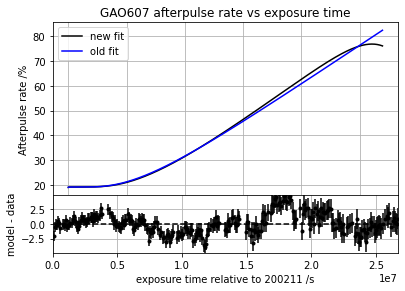

In [40]:
#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
#plt.errorbar(my_x, my_y, yerr=my_y_err,fmt="r.", label="10% He")
plt.plot(x_range, model_eps(x_range, *popt_), 'k', label="new fit")
#plt.plot(x_range, model_eps(x_range, *popt, 0.0000002, 2.5e7), 'y', label="test fit")
plt.plot(x_range, model(x_range, *popt), 'b', label="old fit")
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
#plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.legend()

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(my_x, my_y - model_eps(my_x, *popt_),
                                yerr=my_y_err, fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,my_x[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual_eps.png")

<ipython-input-43-30bc451490a3>:11: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim(0,exposure[-1])


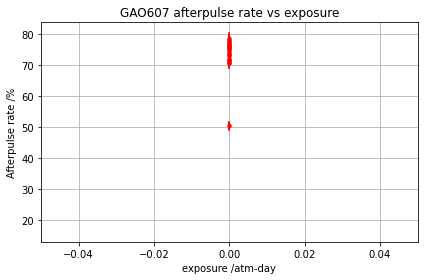

In [43]:
'''#PLOT
x_range_exp = np.linspace(0,exposure[-1],1000)
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))'''
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(exposure[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
#plt.plot(x_range_exp, model(x_range_exp, *popt), 'k')
#frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,exposure[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure")

#Residual plot
'''frame2=fig1.add_axes((.1,.1,.8,.2))
plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")'''
plt.xlabel("exposure /atm-day")
plt.tight_layout()

plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/apulse_rate_ch0_exp.png")

In [44]:
t_range = np.linspace(date[-1], date[-1]*2, 1000)

y = model(t_range, *popt)

for i in range(len(y)):
    if '{:.2}'.format(y[i]) == '1e+02':
        end_t = i
        break

end = (date[-1] + (end_t*date[-1]/1000)) /3600 /24
print(end, 'days')

375.336 days


<ipython-input-45-4f5714afe3af>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


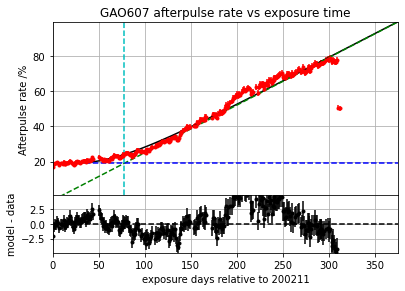

In [45]:
new_t_range = np.linspace(0, end, 1000)

#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date_days[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(new_t_range, model_day(new_t_range, *popt), 'k')
plt.plot(new_t_range, linear_days(new_t_range, popt[0], -popt[0]*popt[1]/6 + popt[2]), 'g--')
plt.axvline(popt[1]/6/3600/24, ls='--', color='c')
plt.axhline(popt[2], ls='--', color='b')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,end)
plt.ylim(1,99)
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date_days[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,end)
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure days relative to 200211")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_extrap.png")

In [46]:
k = 980 * np.sqrt(1/4)
print(k)

490.0


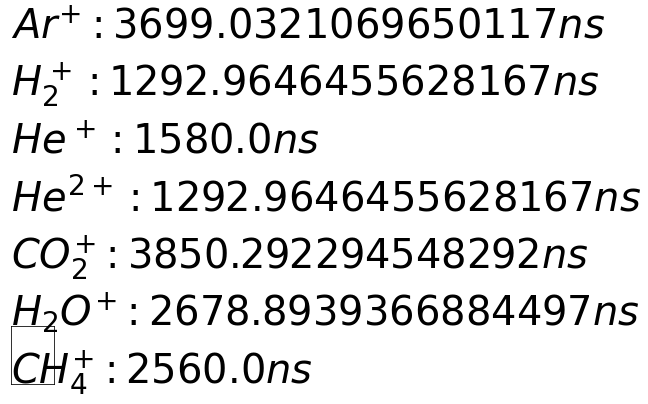

In [47]:
t_H2_1 = k * np.sqrt(2/1)
t_He_1 = k * np.sqrt(4/1)
t_He_2 = k * np.sqrt(4/2)
t_CO2_1 = k * np.sqrt(44/1)
t_H20_1 = k * np.sqrt(18/1)
t_CH4_1 = k * np.sqrt(16/1)
t_Ar_1 = k * np.sqrt(40/1)

a = "H_2^+ : " + str(t_H2_1 + 600) + ' ns'
b = "He^+ :" + str(t_He_1 + 600) + ' ns'
c = "He^{2+} :" + str(t_He_2 + 600) + ' ns'
d = "CO_2^{+} :" + str(t_CO2_1 + 600) + ' ns'
e = "H_2O^{+} :" + str(t_H20_1 + 600) + ' ns'
f = "CH_4^{+} :" + str(t_CH4_1 + 600) + ' ns'
g = "Ar^{+} :" + str(t_Ar_1 + 600) + ' ns'

ax = plt.axes([0,0,0.1,0.2])
plt.text(0,5,'$%s$' %a,size=40)
plt.text(0,4,'$%s$' %b,size=40)
plt.text(0,3,'$%s$' %c,size=40)
plt.text(0,2,'$%s$' %d,size=40)
plt.text(0,1,'$%s$' %e,size=40)
plt.text(0,0,'$%s$' %f,size=40)
plt.text(0,6,'$%s$' %g,size=40)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [48]:
V = 4*np.pi*(4*0.0254)**3/6
l = 0.001
pe = 10000
A = 4*np.pi*(4*0.0254)**2/2

L = popt[1]/6 /3600/24
D = popt[0]*l*V/pe/A
print(D,L)

1.057608624101818e-14 77.61913449217609


# Now for the He apulses

In [49]:
chi_2 = 100
n_times = 1
n = 0
for n in range(n_times):
    p_bounds = [[0,0,0],[1e5,1e10,10]]
    '''p0 = random.uniform(p_bounds[0][0],p_bounds[1][0])
    p1 = random.uniform(p_bounds[0][1],p_bounds[1][1])
    p2 = random.uniform(p_bounds[0][2],p_bounds[1][2])
    p3 = random.uniform(p_bounds[0][3],p_bounds[1][3])
    p4 = random.uniform(p_bounds[0][4],p_bounds[1][4])'''
    p0 = 0.1
    p1 = 1
    p2 = 5
    p_guess = [p0, p1, p2]
    
    popt_he, pcov_he = curve_fit(model, date[mid+1:], he_apulse_rates[mid+1:], sigma=he_apulse_rates_err[mid+1:], p0=p_guess,
                           bounds=p_bounds)
    chi_2 = chi2(he_apulse_rates[mid+1:], he_apulse_rates_err[mid+1:], model(date[mid+1:], *popt_he), len(popt_he))
   
    if chi_2 < 1:
        break


print('Param p{}: {:.8f} ± {:.8f}'.format(0, popt_he[0], np.sqrt(pcov_he[0,0])))
print('Param p{}: {:.9f} ± {:.9f}'.format(1, popt_he[1], np.sqrt(pcov_he[1,1])))
print('Param p{}: {:.1f} ± {:.1f}'.format(2, popt_he[2], np.sqrt(pcov_he[2,2])))
print('Chi2 is:', chi_2)

Param p0: 0.00000293 ± 0.00000003
Param p1: 30352526.245895214 ± 0.000000014
Param p2: 4.4 ± 0.2
Chi2 is: 8.66284667246626


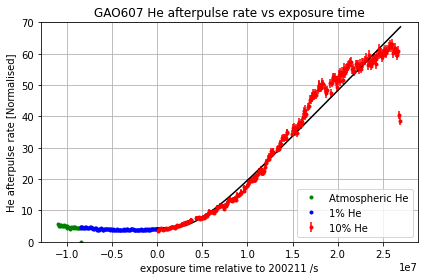

In [50]:
plt.plot(date[:start + 1], np.array(he_apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date[start+1:mid + 1], np.array(he_apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.errorbar(date[mid+1:], np.array(he_apulse_rates[mid+1:]), yerr=np.array(he_apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
x_range = np.linspace(0,date[-1],1000)
plt.plot(x_range, model(x_range, *popt_he), 'k')
#plt.axvline(date[start], 0, 100, ls='--', color='k')
#plt.axvline(date[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure time relative to 200211 /s")
plt.ylabel("He afterpulse rate [Normalised]")
plt.title("GAO607 He afterpulse rate vs exposure time")
plt.grid()
plt.ylim(0,70)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_he.png")

<ipython-input-60-a462a5e2994e>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


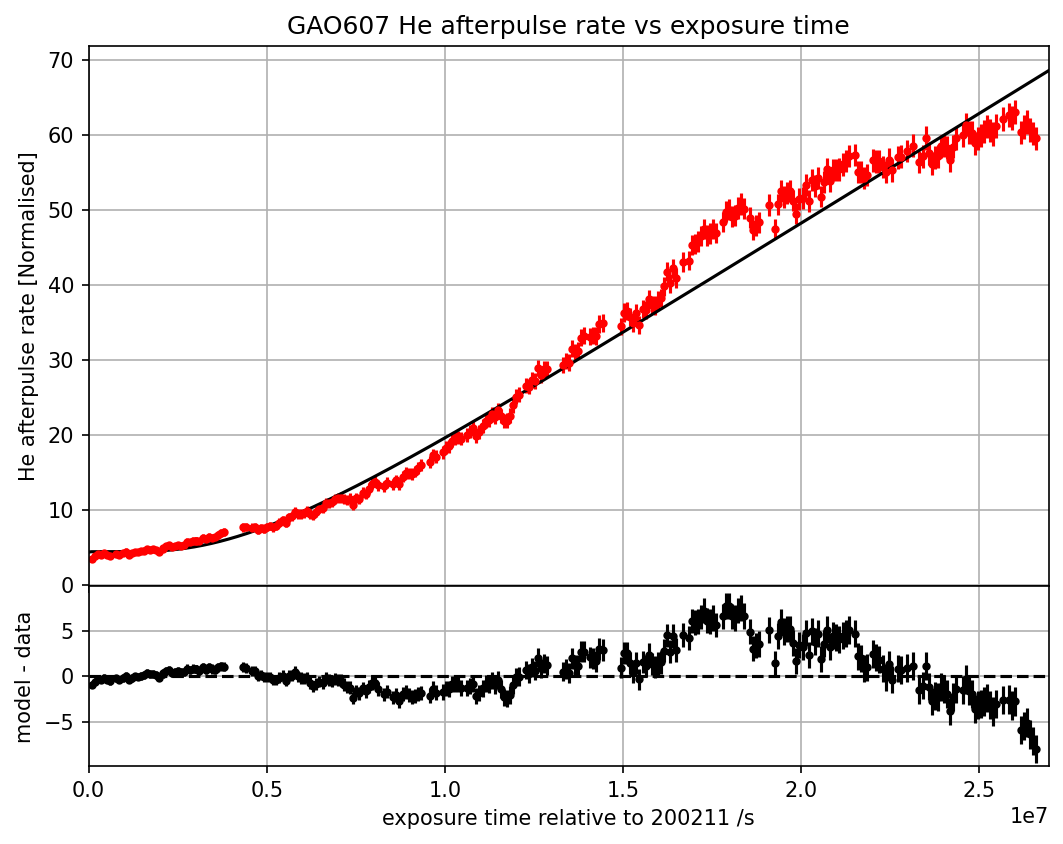

In [60]:
#PLOT
fig1 = plt.figure(figsize=(8, 6), facecolor='white', dpi=150)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date[mid+1:][:-3], np.array(he_apulse_rates[mid+1:][:-3]), yerr=np.array(he_apulse_rates_err[mid+1:])[:-3],
                 fmt="r.", label="10% He")
plt.plot(x_range, model(x_range, *popt_he), 'k')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("He afterpulse rate [Normalised]")
plt.title("GAO607 He afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date[mid+1:][:-3], np.array(he_apulse_rates[mid+1:][:-3])- model(date[mid+1:][:-3], *popt_he),
                                yerr=np.array(he_apulse_rates_err[mid+1:])[:-3], fmt='k.')
plt.ylim(-9.9,9.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual_he.png")

In [52]:
t_range = np.linspace(date[-1], date[-1]*2, 1000)

y = model(t_range, *popt_he)

for i in range(len(y)):
    if '{:.2}'.format(y[i]) == '1e+02':
        end_t = i
        break

end = (date[-1] + (end_t*date[-1]/1000)) /3600 /24
print(end, 'days')

434.30400000000003 days


<ipython-input-23-13632df76bc1>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


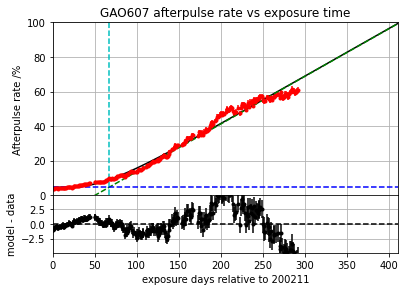

In [23]:
new_t_range = np.linspace(0, end, 1000)

#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date_days[mid+1:], np.array(he_apulse_rates[mid+1:]), yerr=np.array(he_apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(new_t_range, model_day(new_t_range, *popt_he), 'k')
plt.plot(new_t_range, linear_days(new_t_range, popt_he[0], -popt_he[0]*popt_he[1]/6 + popt_he[2]), 'g--')
plt.axvline(popt_he[1]/6/3600/24, ls='--', color='c')
plt.axhline(popt_he[2], ls='--', color='b')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,end)
plt.ylim(0,100)
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date_days[mid+1:], np.array(he_apulse_rates[mid+1:])- model(date[mid+1:], *popt_he),
                                yerr=np.array(he_apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,end)
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure days relative to 200211")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_he_extrap.png")

In [24]:
V = 4*np.pi*(4*0.0254)**3/6
l = 0.001
pe = 10000
A = 4*np.pi*(4*0.0254)**2/2

L = popt_he[1]/6 /3600/24
D = popt_he[0]*l*V/pe/A
print(D,L)

1.0807196500963721e-14 66.99652248088515


In [106]:
y = np.array([2.38973875e-01, 2.54450279e-01, 2.07728448e-01, 1.45481443e-01,
 8.35758295e-02, 4.12595711e-02, 1.75735210e-02, 7.00664900e-03,
 2.77990018e-03, 7.96579585e-04, 2.92621072e-04, 6.50269049e-05,
 1.62567262e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])
my_bins = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

y_err = np.array([1.97102138e-03, 2.03384376e-03, 1.83765555e-03, 1.53787105e-03,
 1.16561860e-03, 8.18989770e-04, 5.34497299e-04, 3.37498078e-04,
 2.12584073e-04, 1.13796973e-04, 6.89713808e-05, 3.25134207e-05,
 1.62567104e-05, 1.62567104e-06, 1.62567104e-06, 1.62567104e-06,
 1.62567104e-06, 1.62567104e-06, 1.62567104e-06])

In [107]:
'''print(y_err)
last_err = 1
for i in range(len(y_err)):
    temp_err = x_err[i]
    if y_err[i] < last_err:
        if y_err[i] == 0:
            y_err[i] = last_err
            continue
        last_err = temp_err
print(y_err)'''

'print(y_err)\nlast_err = 1\nfor i in range(len(y_err)):\n    temp_err = x_err[i]\n    if y_err[i] < last_err:\n        if y_err[i] == 0:\n            y_err[i] = last_err\n            continue\n        last_err = temp_err\nprint(y_err)'

In [4]:

global M
M = []
f=open("/Users/willquinn/Downloads/Matrix1.txt", "r")
fl =f.readlines()
for i, line in enumerate(fl):
    if i == 0:
        continue
    temp = []
    for j,token in enumerate(line.split(",")):
        if j == 0:
            continue
        if i == 1 and j == 1:
            temp.append(1)
            continue
        temp.append(int(token.strip())/500)
    M.append(temp)
M = np.array(M)

In [160]:
def gaus(x,mu,sig,A):
    return A*np.exp( -0.5*((x - mu)/sig)**2)

def gaus_mod(x,mu,sig,A):
    diff = x - mu
    exponent = np.exp( -0.5*(diff/sig)**2 )
    val = M.T @ np.array(A*exponent)
    return val

def glob_test():
    print(M)
    


[1.00218264 2.39525842 0.25075912]
5.574144347225169


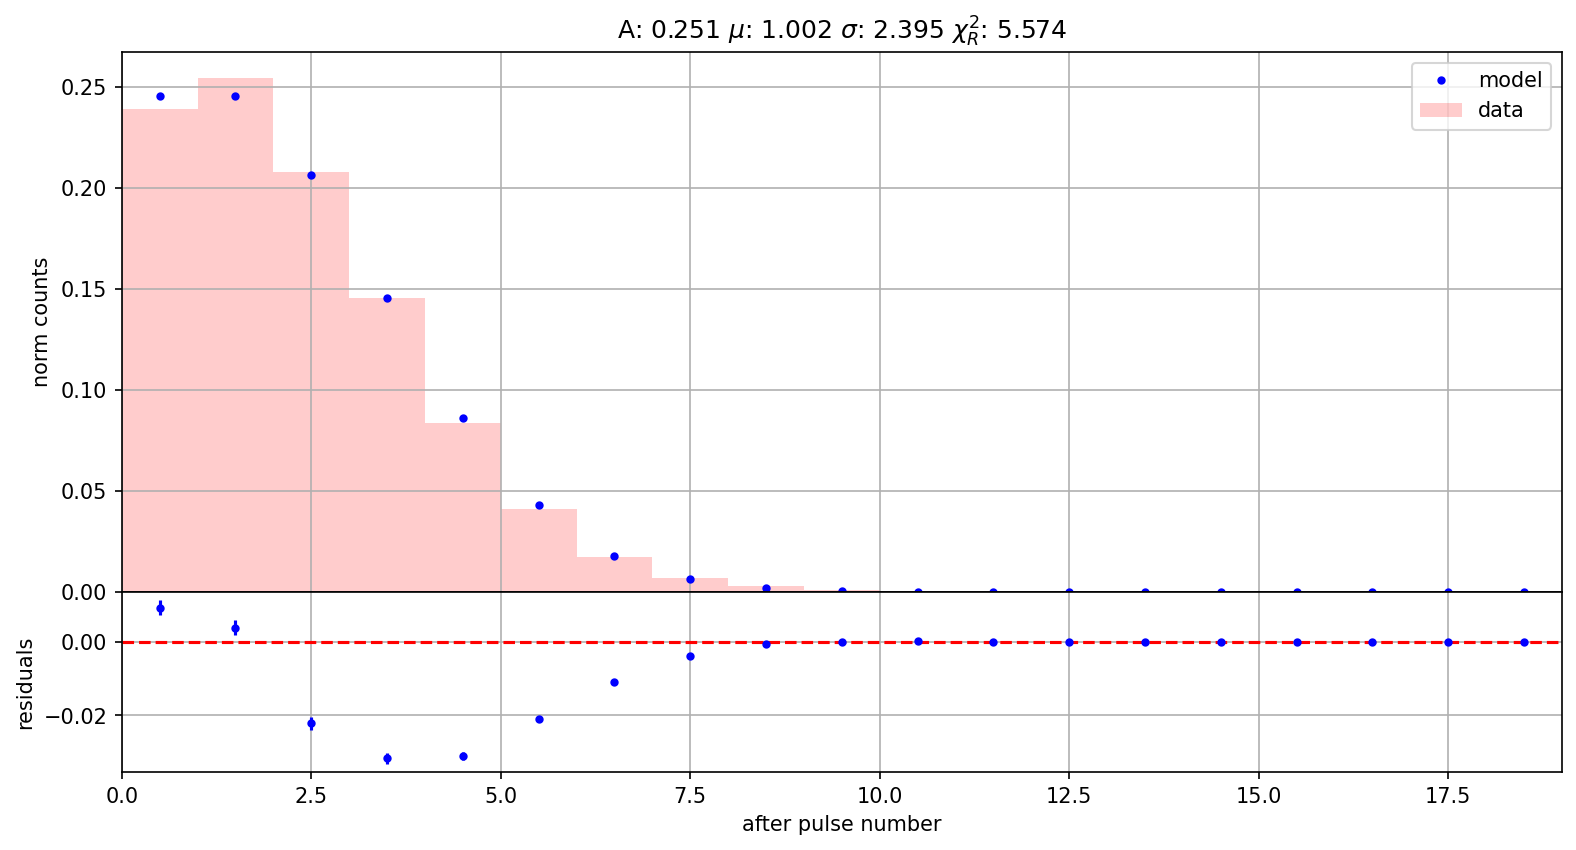

In [181]:
popt, pcov = curve_fit(xdata=np.array(my_bins) + 0.5, ydata=np.array(y), f=gaus, sigma=y_err, p0=[1,1,1])
print(popt)
my_chi2 = chi2(n_par=len(popt),y_err=y_err,y_exp=y,y_obs=gaus(my_bins+0.5,*popt))
print(my_chi2)
#PLOT
fig1 = plt.figure(figsize=(12,6), facecolor='white', dpi=150)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.bar(my_bins, y, width=1, align='edge', color='r',alpha= 0.2,label='data')
#plt.plot(my_bins + 0.5, x, "r.", label='data')
plt.plot(my_bins+0.5, gaus(my_bins+0.5,*popt),"b.",label='model')
plt.xlim(0,19)
plt.grid()
plt.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
plt.legend(loc='upper right')
plt.ylabel("norm counts")
plt.title("A: {:.3f}".format(popt[2]) + r" $\mu$:" + " {:.3f}".format(popt[0]) +
          r" $\sigma$: "+ "{:.3f}".format(popt[1])+ r" $\chi_R^2$:" + " {:.3f}".format(my_chi2))
#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
plt.xlim(0,19)
#plt.ylim(-1,1)
plt.grid()
plt.errorbar(my_bins + 0.5,y-gaus(my_bins,*popt),yerr=y_err,fmt="b.")
plt.axhline(0,ls='--', color='r')
plt.ylabel("residuals")
plt.xlabel("after pulse number")

plt.savefig("/Users/willquinn/Desktop/gaus.png")


In [182]:
mod_popt, mod_pcov = curve_fit(xdata=np.array(my_bins) + 0.5, ydata=np.array(y), f=gaus_mod, sigma=y_err, p0=[1,1,1])
print(mod_popt)
mod_my_chi2 = chi2(n_par=len(mod_popt),y_err=y_err,y_exp=y,y_obs=gaus_mod(my_bins+0.5,*mod_popt))
print(mod_my_chi2)

[0.93661739 2.56063943 0.24154996]
8.77834125523494


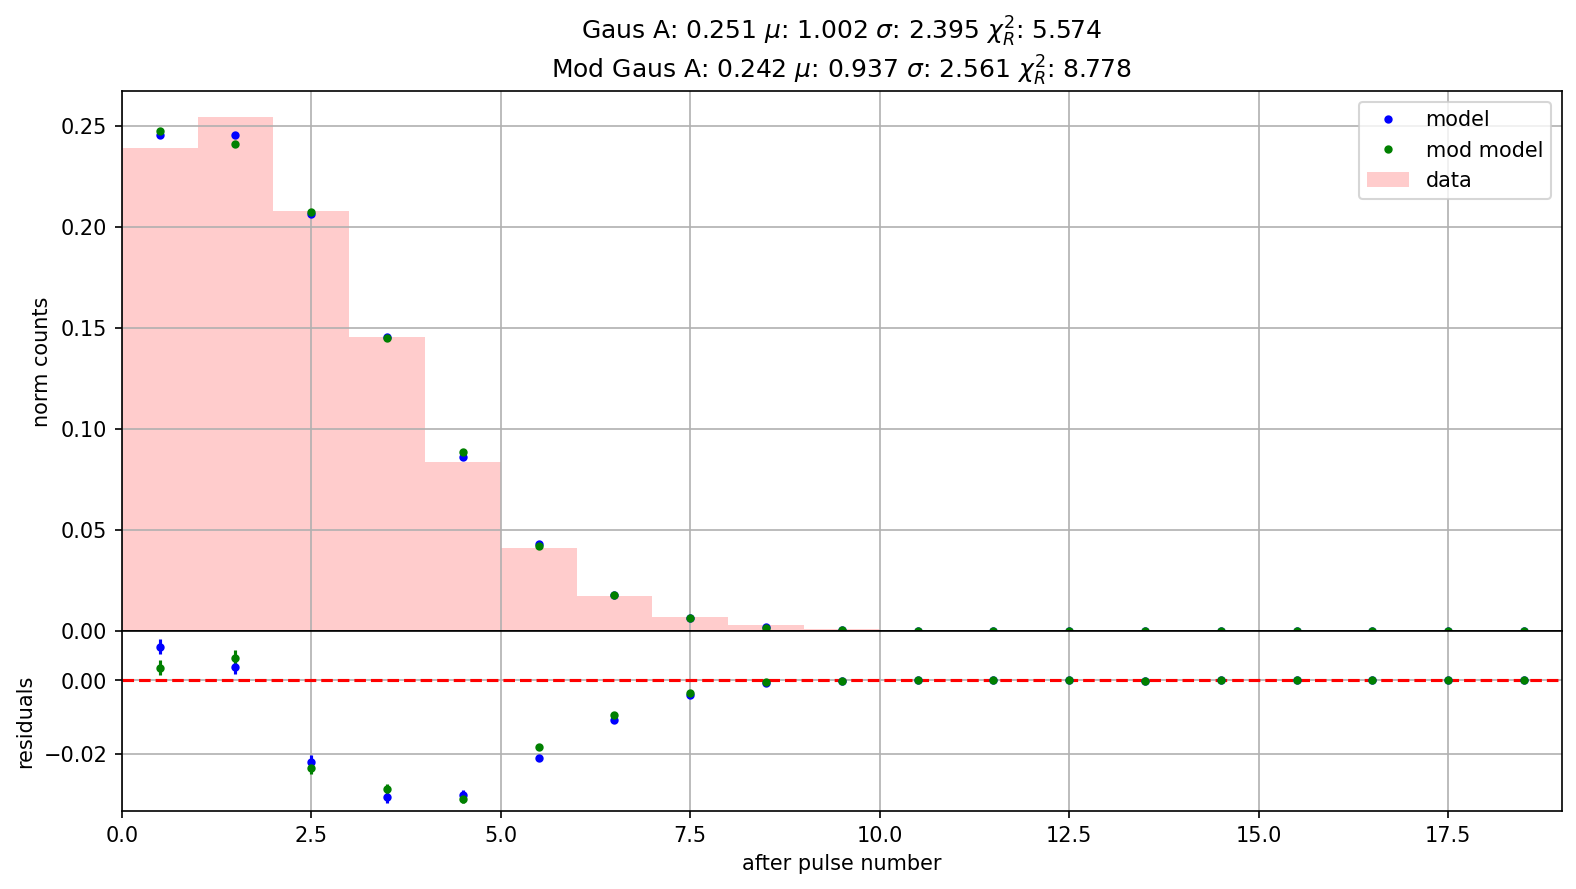

In [187]:
fig1 = plt.figure(figsize=(12,6), facecolor='white', dpi=150)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.bar(my_bins, y, width=1, align='edge', color='r',alpha= 0.2,label='data')
#plt.plot(my_bins + 0.5, x, "r.", label='data')
plt.plot(my_bins+0.5, gaus(my_bins+0.5,*popt),"b.",label='model')
plt.plot(my_bins+0.5, gaus_mod(my_bins+0.5,*mod_popt),"g.",label='mod model')
plt.xlim(0,19)
plt.grid()
plt.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
plt.legend(loc='upper right')
plt.ylabel("norm counts")
plt.title("Gaus A: {:.3f}".format(popt[2]) + r" $\mu$:" + " {:.3f}".format(popt[0]) +
          r" $\sigma$: "+ "{:.3f}".format(popt[1])+ r" $\chi_R^2$:" + " {:.3f}".format(my_chi2) +
          "\nMod Gaus A: {:.3f}".format(mod_popt[2]) + r" $\mu$:" + " {:.3f}".format(mod_popt[0]) +
          r" $\sigma$: "+ "{:.3f}".format(mod_popt[1])+ r" $\chi_R^2$:" + " {:.3f}".format(mod_my_chi2))
#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
plt.xlim(0,19)
#plt.ylim(-1,1)
plt.grid()
plt.errorbar(my_bins + 0.5,y-gaus(my_bins,*popt),yerr=y_err,fmt="b.")
plt.errorbar(my_bins + 0.5,y-gaus_mod(my_bins,*mod_popt),yerr=y_err,fmt="g.")
plt.axhline(0,ls='--', color='r')
plt.ylabel("residuals")
plt.xlabel("after pulse number")

plt.savefig("/Users/willquinn/Desktop/gaus_mod.png")

[2.0201817  0.50000003 0.77187866]
1278.3157728742049


<BarContainer object of 19 artists>

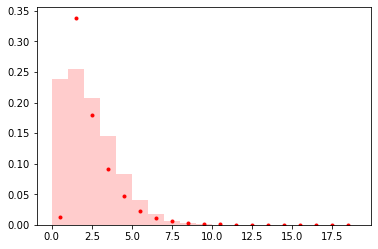

In [196]:
import scipy.stats as scips
def my_ch(x,df,loc,scale):
    return M.T @ scips.chi2.pdf(x,df,loc,scale)
popt_,pcov_ = curve_fit(xdata=np.array(my_bins) + 0.5, ydata=np.array(y), f=my_ch, sigma=y_err)
print(popt_)
chi2_ = chi2(n_par=len(popt_),y_err=y_err,y_exp=y,y_obs=my_ch(my_bins+0.5,*popt_))
print(chi2_)
plt.plot(my_bins + 0.5, my_ch(my_bins + 0.5,*popt_), "r.")
plt.bar(my_bins, y, width=1, align='edge', color='r',alpha= 0.2,label='data')

In [46]:
can = ROOT.TCanvas()
hist = ROOT.TH2D("Matrix", "Matrix", len(M), 0, len(M), len(M), 0, len(M))
ROOT.gStyle.SetOptStat(0)
for i in range(len(M)):
    for j in range(len(M)):
        hist.SetBinContent(i+1,j+1,M[j][i])
        
hist.Draw('colztext')
hist.SetXTitle("Obvs Apulse Num")
hist.SetYTitle("Injected Apulse Num")
hist.SetTitle("Apulse Smearing Matrix")
can.SetGrid()
can.SaveAs("/Users/willquinn/Desktop/matrix.png")

del hist
del can

Info in <TCanvas::Print>: png file /Users/willquinn/Desktop/matrix.png has been created


[[19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 19.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

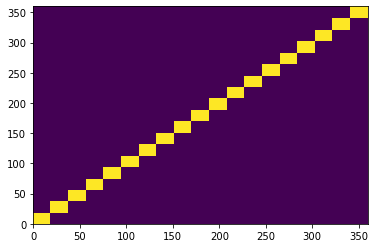

In [38]:
a= plt.hist2d([i for i in range(M.size)],[i for i in range(M.size)],bins=19)

print(a[0], M.size)